In [1]:
#Method #1. Tree-based classification

#Step 1: Collecting the data
import pandas as pd # import the csv file 
input_file = "C:/MyData Late-Spring/530 Machine Learning/data/creditData.csv" 
credit = pd.read_csv(input_file)
#If you want to see how the dataset is organized, you may use command head() 


In [2]:
credit.head(4)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2


In [3]:
#Use the describe() command to check what is in the credit object created to hold the data in Python.
#The describe command is shown below with the first few lines returned. 
credit.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [4]:
#Step 2:Exploring the data
#There are many ways you can further check the data in this object, e.g. info or describe.
#For example, you can use the info() command to get information about properties of all the variables 
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int64
Account Balance                      1000 non-null int64
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null int64
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    10

In [5]:
#What is target variable? Let’s store it in a new variable. 
target = credit['Creditability']

In [6]:
#If you want to see the number of each category of target variable you can use following command: 
target.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [7]:
#In order to develop the tree-based classification model you need to split the data into training and test records. 
#There are many ways that we can make this split. 
#We introduce two methods here:

#Method 1: # Generate random numbers 
import random 
random.seed(12345) 
indx = random.sample(range(0, 1000), 1000) 
credit_rand = credit.iloc[indx] 
target_rand = target.iloc[indx]

In [8]:
#We can see the result of randomization using:
credit_rand.head(5)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
426,1,2,39,3,6,11760,2,4,2,3,...,3,4,32,3,1,1,3,1,2,1
750,1,2,36,3,0,2862,2,5,4,3,...,3,4,30,3,3,1,3,1,1,1
10,1,1,11,4,0,3905,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
839,0,4,12,2,0,1386,3,3,2,2,...,2,2,26,3,2,1,3,1,1,1
845,0,2,27,4,3,2520,3,3,4,3,...,2,2,23,3,2,2,2,1,1,1


In [9]:
#make sure that randomizing your data has not made any substantive changes to it, i.e. the means should still be the same
credit_rand.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [10]:
#Compare this result to what we had earlier.
#You’ll need to subset the observations (records) to establish the training set and the test set. 
#Sort of a rule of thumb is to use between 75% and 90% of the records for the training set. 
#There are many ways to do this in Python. For example, you can use: 
credit_train = credit_rand.iloc[0:700] 
credit_test = credit_rand.iloc[700:1000] 
target_train = target_rand.iloc[0:700] 
target_test = target_rand.iloc[700:1000]

In [11]:
#If the randomization went well then the percentages between splits should be close.
#Before we checked on the number of defaults for both training and test.This time we want to see the percentage of each: 
target_train.value_counts()/700

1    0.691429
0    0.308571
Name: Creditability, dtype: float64

In [12]:
target_test.value_counts()/300

1    0.72
0    0.28
Name: Creditability, dtype: float64

In [13]:
# Method 2 of splitting the model 
from sklearn.model_selection import train_test_split 
y = target 
X = credit.drop(['Creditability'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=52)

In [14]:
#Step 3: Training a model on the data
#You only need one command line to create the decision tree model. 
#However, now you need to set-up this command so that the algorithm knows that the class or 
#response variable is in the 17th column. The command and the model created are: 

# Design decision tree 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
model = tree.DecisionTreeClassifier() 
model = model.fit(X_train, y_train)

In [15]:
model


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

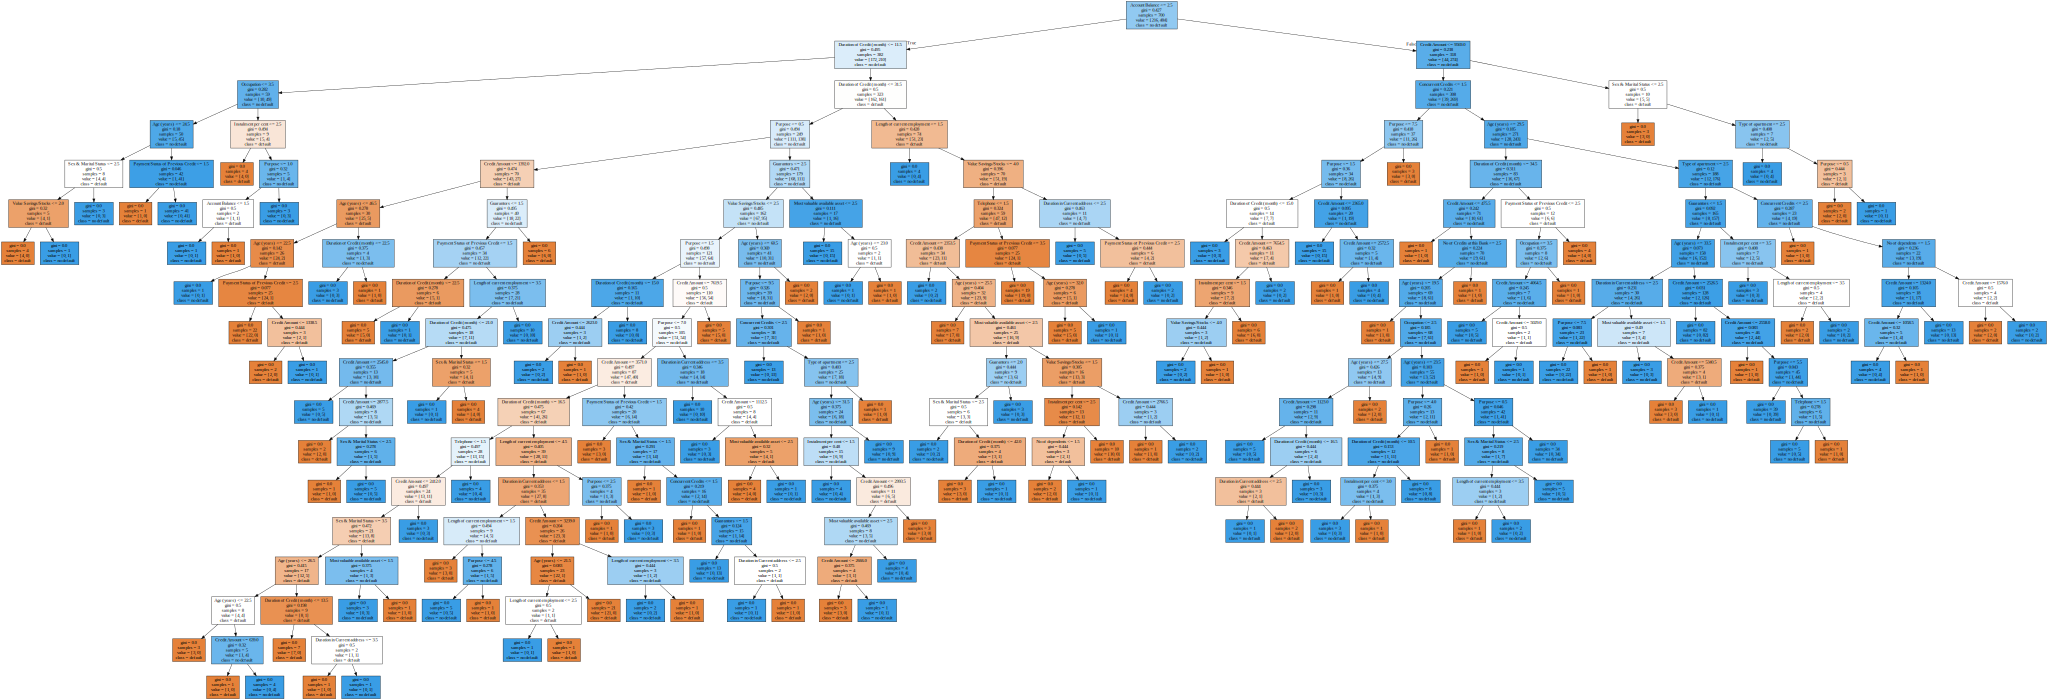

In [16]:
#To visualize the model, we can use:                                    
from IPython.display import SVG 
from graphviz import Source 
from IPython.display import display 
graph = Source(tree.export_graphviz(model, out_file=None , feature_names=X.columns, class_names=['default', 'no default'] , filled = True)) 
display(SVG(graph.pipe(format='svg')))

In [17]:
#Step 4: Evaluating Model Performance
#We still need to use our test set to evaluate/validate the model’s overall performance. 
#To do this we’ll use the predict() command as follows:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

y_predict = model.predict(X_test) 
print(confusion_matrix(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict)*100)

[[ 39  45]
 [ 47 169]]
69.33333333333334


In [18]:
###########################################################################################################################
# Q1- If you see the accuracy 0f 100%, what does it mean? Does this mean that we design a perfect model? 
#     This is some thing that needs more discussion. Write a few sentences about accuracy of 100%.
# Answer 1- If we see the see the accuracy 0f 100% then this situation is called Overfit when model having a accuracy  
# more than 95%.Overfitting is a modeling error which occurs when a function is too closely fit to a limited set of data 
# points.I experienced the same thing that certain algorithms like trees are prone to overfitting, due to their 
# tuning parameters.
###########################################################################################################################

In [19]:
#Part 2-Random forest.Let’s use the same dataset but this time for random forest. 
#Use the similar strategy described in course to see the accuracy.
from sklearn.ensemble import RandomForestClassifier 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=52)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict)*100)

[[ 46  38]
 [ 44 172]]
72.66666666666667


C:\Users\roli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
#One of the interesting properties of Random forest algorithm is that it lets you see the importance of features.
import pandas as pd 
feature_importances = pd.DataFrame(clf.feature_importances_,index = X_train.columns,
columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Credit Amount,0.120984
Age (years),0.115144
Duration of Credit (month),0.113677
Account Balance,0.087744
Payment Status of Previous Credit,0.066675
Value Savings/Stocks,0.061849
Length of current employment,0.057670
Most valuable available asset,0.048151
Purpose,0.047182
Sex & Marital Status,0.042310


In [21]:
###########################################################################################################################
# Q2 –What are the three most important features in this model.
# Answer 2- Credit Amount  	0.139151
#          Account Balance 	0.108843
#          Age (years) 	0.106622
# Change the random seed to 23458 and find the new accuracy of random forest.
# Answer - the accuracy increased from 68.0 to 73.0 , it means the random forest helped improved the model.
###########################################################################################################################

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=23458)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict)*100)

[[ 44  38]
 [ 48 170]]
71.33333333333334


C:\Users\roli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
#Method #2. Random forest
#Let’s use the same dataset but this time for random forest. Use the similar strategy described in course to see the accuracy. # Part 2 Random forest 
from sklearn.ensemble import RandomForestClassifier 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=23458)
clf = RandomForestClassifier() 
clf.fit(X_train, y_train)
clf

C:\Users\roli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
y_predict = clf.predict(X_test) 
print(confusion_matrix(y_test, y_predict))

[[ 43  39]
 [ 42 176]]


In [25]:
print(accuracy_score(y_test, y_predict)*100)

73.0


In [26]:
#Method #3. Adding regression to trees
#Step 1: Collecting the Data
input_file = "C:/MyData Late-Spring/530 Machine Learning/data/whitewines.csv" 
wine = pd.read_csv(input_file) 
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.62,0.24,1.10,0.039,6.0,62.0,0.99340,3.41,0.32,10.400000,5
1,5.7,0.22,0.20,16.00,0.044,41.0,113.0,0.99862,3.22,0.46,8.900000,6
2,5.9,0.19,0.26,7.40,0.034,33.0,123.0,0.99500,3.49,0.42,10.100000,6
3,5.3,0.47,0.10,1.30,0.036,11.0,74.0,0.99082,3.48,0.54,11.200000,4
4,6.4,0.29,0.21,9.65,0.041,36.0,119.0,0.99334,2.99,0.34,10.933333,6


In [27]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [28]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [29]:
#we will use regression we should check to see if the class variable, quality, follows a normal distribution or 
#is nearly normal. # Plot the target variable 
import matplotlib.pyplot as plt 
# An "interface" to matplotlib.axes.Axes.hist() method 
n, bins, patches = plt.hist(x=wine['quality'], bins='auto', color='b', ) 
plt.xlabel('Quallity Value') 
plt.ylabel('Frequency') 
plt.show()

<Figure size 640x480 with 1 Axes>

In [30]:
#Step 2: Exploring and Preparing the Data
#Essentially all we need to do this time is to subset our data into training and test sets. 
#Let’s use an approximately 60% for training and 40% for testing split of the observations.

#Step 3: Training a Model on the Data Design the model similar the way you did earlier. 
target = wine['quality']
target.value_counts()


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [31]:
# Method 2 of splitting the model 
from sklearn.model_selection import train_test_split 
y = target 
X = wine.drop(['quality'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1234)
model = tree.DecisionTreeClassifier() 
model = model.fit(X_train, y_train)

In [32]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
#To get the basic information about the tree, you can export the information of the model to a .dot file. 
from sklearn.tree import export_graphviz 
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(model, out_file ='tree.dot', feature_names =X.columns)

In [34]:
#You may see the regression graph using following commands: 
from graphviz import Source 
dot_data = tree.export_graphviz(model, out_file=None,feature_names=X.columns, filled=True, rounded=True, special_characters=True) 
graph = Source(dot_data) 
graph

In [35]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

y_predict = model.predict(X_test) 
print(confusion_matrix(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict)*100)

[[  0   1   4   0   1   0   0]
 [  0  13  26  17   3   0   0]
 [  1  27 360 151  25   3   0]
 [  3  14 167 559 114  18   1]
 [  0   2  22 135 196  22   1]
 [  0   1   4  26  12  28   0]
 [  0   0   0   2   1   0   0]]
58.97959183673469


In [36]:
#Step 4: Evaluating Model Performance
import numpy as np
np.corrcoef(y_test,y_predict)

array([[1.       , 0.5472409],
       [0.5472409, 1.       ]])

In [37]:
from sklearn.metrics import mean_squared_error
import math 


rmse= math.sqrt(mean_squared_error(y_test, y_predict))
print(rmse)

RMSE =mean_squared_error(y_predict,y_test)**0.5
RMSE

0.8345229603962802


0.8345229603962802

In [38]:
#Our model has a error rate of 0.84.
###########################################################################################################################
# Q3- What is your interpretation about this amount of RMSE?
# Answer 3- As to 0.84 is very likely to indicate overfitting.Lower the RMSE it indicates the better fit , in this case it 
# is very high indicating overfitting.
###########################################################################################################################

In [39]:
#Method #4. News Popularity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
#Loading the dataset
input_file = "C:/MyData Late-Spring/530 Machine Learning/data/OnlineNewsPopularity_for_python.csv" 
df = pd.read_csv(input_file, header=0)

In [41]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [42]:
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

In [43]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
X = df[0:58]
Y = df['shares']

In [45]:
# Get the statistics of original target attribute
data = df[df.keys()[-1]]
data.describe()
# Encode the label by threshold 1400
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
popular_label = pd.Series(label_encoder.fit_transform(data>=1400))

In [46]:
popular = df.shares >= 1400
unpopular = df.shares < 1400
df.loc[popular,'shares'] = 1
df.loc[unpopular,'shares'] = 0

In [47]:
features=list(df.columns[2:60])

In [48]:
# split dataset to 70-30 training and testing resp.
X_train, X_test, y_train, y_test = train_test_split(df[features], df['shares'], test_size=0.30 ,random_state=23458)

#Shape of  training and test datasets
print(X_train.shape)
print(y_train.shape)

(27750, 58)
(27750,)


In [49]:
# Design decision tree 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
model = tree.DecisionTreeClassifier() 
model = model.fit(X_train, y_train)

In [50]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
#Decision Tree model and accuracy
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

y_predict = model.predict(X_test) 
print(confusion_matrix(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict)*100)

[[3046 2477]
 [2456 3915]]
58.52530687741718


In [52]:
RMSE =mean_squared_error(y_predict,y_test)**0.5
RMSE

0.6440084869206525

In [53]:
#Random forest
#Let’s use the same dataset but this time for random forest. Use the similar strategy described in course to see the accuracy. # Part 2 Random forest 
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier() 
clf.fit(X_train, y_train)
clf

C:\Users\roli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
y_predict = clf.predict(X_test)
print(confusion_matrix(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict)*100)

[[3621 1902]
 [2525 3846]]
62.77955271565495


In [55]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

In [56]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__  
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

 
    
print("="*30)

DecisionTreeClassifier
****Results****
Accuracy: 58.1386%


C:\Users\roli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier
****Results****
Accuracy: 62.6198%


In [57]:
#One of the interesting properties of Random forest algorithm is that it lets you see the importance of features.
import pandas as pd 
feature_importances = pd.DataFrame(clf.feature_importances_,index = X_train.columns,
columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
kw_avg_avg,0.042567
LDA_02,0.036278
kw_max_avg,0.035464
self_reference_min_shares,0.034389
self_reference_avg_sharess,0.030314
kw_avg_min,0.030189
LDA_01,0.029859
kw_avg_max,0.029763
LDA_00,0.028968
global_subjectivity,0.027670


In [58]:
RMSE =mean_squared_error(y_predict,y_test)**0.5
RMSE

0.6100856274683502

In [59]:
## change random seed to 23458 

In [60]:
###########################################################################################################################
# Q4 - Try decision tree and random forest and evaluate the model
# Answer 4- Random forest model seems to work better than decision tree 
# Accuracy for Decision tree is 58.4665%
# Accuracy for Random forest tree is 62.4264%
# RMSE  for Decision tree is 0.64
# RMSE for Random forest tree is 0.61
# 3 important features identified are:
# kw_avg_avg 	0.044775
# kw_max_avg 	0.039475
# LDA_02 	0.034346
##########################################################################################################################